# Importing necessary modules

In [7]:
import numpy as np
import matplotlib.pyplot as plt
import pandas as pd

# Loading dataset

In [8]:
parquet_file=r'C:/Users/Acer/Downloads/data.parquet'
data = pd.read_parquet(parquet_file,engine='auto')

# Handling missing values by filling with the mean of the previous 10 data points and calculating spread

In [9]:
data.fillna(data.rolling(10, min_periods=1).mean(), inplace=True)
data['Spread'] = data['banknifty'] - data['nifty']

# Implementing percentage based strategy

In [10]:
max_threshold=(data['Spread'].max()-data['Spread'].min())*3/4
min_theshold =(data['Spread'].max()-data['Spread'].min())*1/4
data['Signal'] = np.where(data['Spread'] > max_threshold, -1, np.where(data['Spread'] < min_theshold, 1, 0))

# Calculating Profit-loss
data['P_L'] = data['Spread'] * (data['tte'] ** 0.7)

# Backtesting the trading system
data['Returns'] = data['Signal'].shift(1) * data['P_L']
data['Cumulative_Returns'] = data['Returns'].cumsum()

# Plotting the trading signals

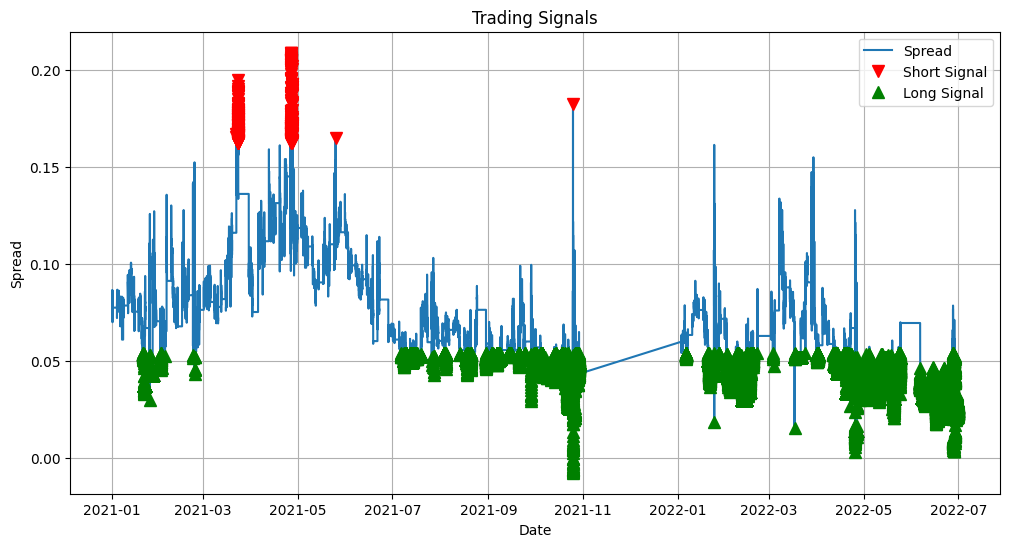

In [11]:
plt.figure(figsize=(12, 6))
plt.plot(data.index, data['Spread'], label='Spread')
plt.plot(data[data['Signal'] == -1].index, data['Spread'][data['Signal'] == -1], 'rv', markersize=8, label='Short Signal')
plt.plot(data[data['Signal'] == 1].index, data['Spread'][data['Signal'] == 1], 'g^', markersize=8, label='Long Signal')
plt.title('Trading Signals')
plt.xlabel('Date')
plt.ylabel('Spread')
plt.legend()
plt.grid(True)
plt.show()

# Performance Metrics

In [12]:
sharpe_ratio= (data['Returns'].mean()-.001) / data['Returns'].std() # Taking risk free rate as 0.001
absolute_pl= data['Cumulative_Returns'].iloc[-1]
drawdown = (data['Cumulative_Returns'] - data['Cumulative_Returns'].cummax()).min()

print("Percentage Based Strategy Performance Metrics:")
print("Sharpe Ratio:", sharpe_ratio) 
print("Absolute P/L:", absolute_pl)
print("Drawdown:", drawdown)

Percentage Based Strategy Performance Metrics:
Sharpe Ratio: 0.49620142670580286
Absolute P/L: 50206.71846674799
Drawdown: -512.20908974103
